In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [110]:
data = pd.read_csv("etf500.csv")


In [111]:

columns_to_convert = ['Price', 'Open', 'High', 'Low']
for column in columns_to_convert:
    data[column] = data[column].str.replace(',', '').astype(float)

# Convert 'Change %' to numerical values by removing the '%' sign and converting to float
data['Change %'] = data['Change %'].str.rstrip('%').astype(float)

# Convert 'Vol.' to a uniform measure (thousands) and to float
data['Vol.'] = data['Vol.'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

# Show the cleaned data description
data.describe()


,Price,Open,High,Low,Vol.,Change %
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,39298.783877,39532.725557,40490.849057,38991.548885,1622.041166,0.049005
std,5709.645369,5762.696367,17625.623051,5698.257860,12014.330194,1.207287
min,29759.000000,30120.000000,30273.000000,30000.000000,10.000000,-4.810000
25%,34394.500000,34694.500000,34900.000000,34147.500000,220.000000,-0.740000
50%,37653.000000,38236.000000,38414.000000,37335.000000,480.000000,0.060000
75%,43121.500000,43419.000000,43562.500000,42869.000000,1050.000000,0.815000
max,51932.000000,52500.000000,442159.000000,51489.000000,284170.000000,6.350000


In [112]:
# Exchange rate from USD to ZAR
exchange_rate_usd_to_zar = 18.46

# Convert the prices to ZAR
data['Price_ZAR'] = data['Price'] * exchange_rate_usd_to_zar

# Show the first few rows of the dataset to confirm the conversion
data[['Date', 'Price', 'Price_ZAR']].head()


,Date,Price,Price_ZAR
0,05/06/2024,49163.0,907548.98
1,05/03/2024,49354.0,911074.84
2,05/02/2024,48872.0,902177.12
3,04/30/2024,50052.0,923959.92
4,04/29/2024,49937.0,921837.02


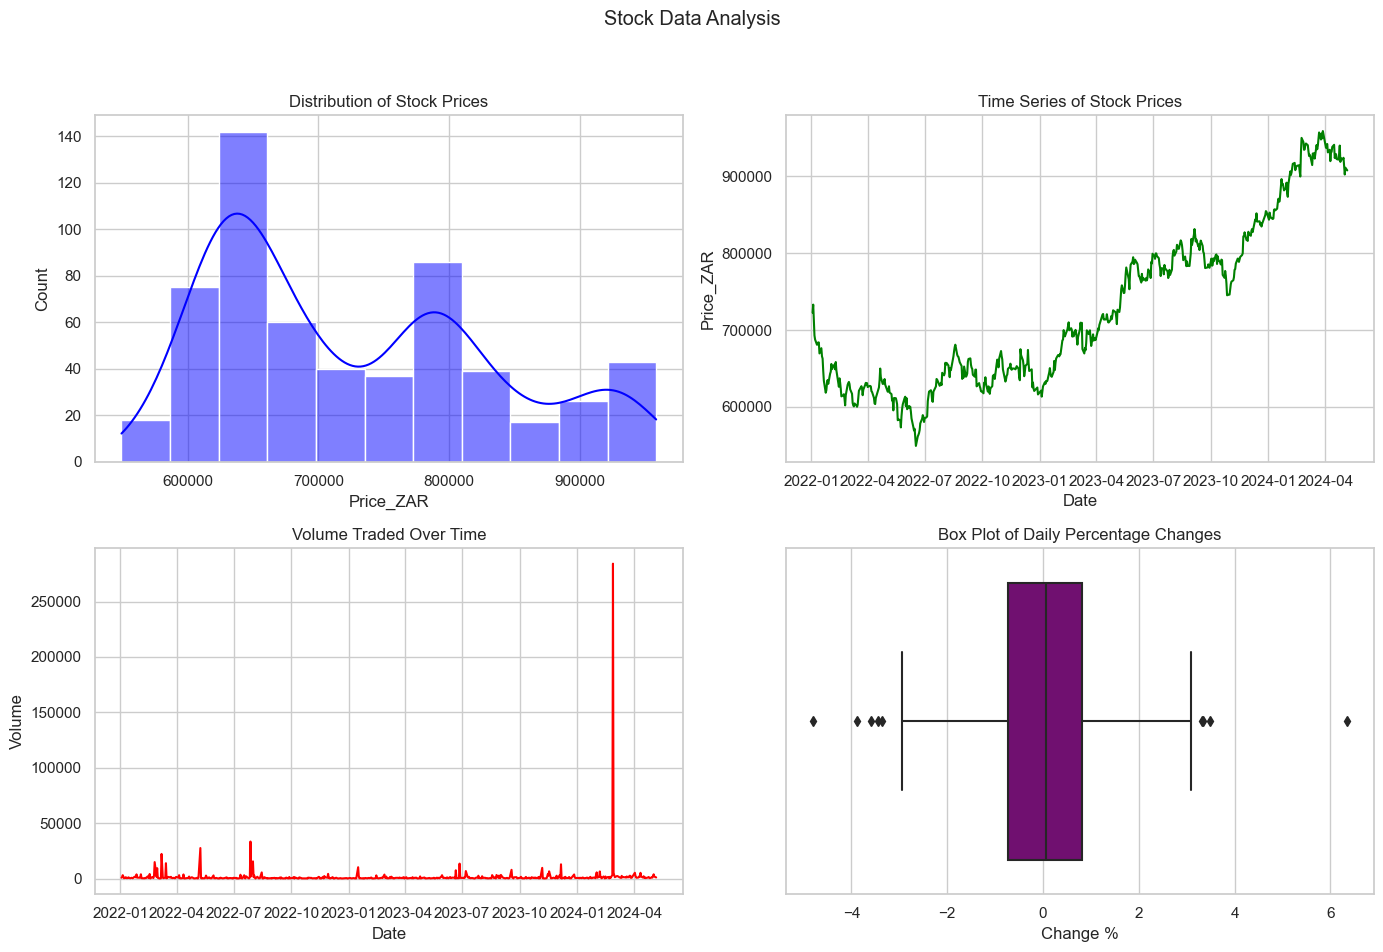

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date to datetime for plotting
data['Date'] = pd.to_datetime(data['Date'])

# Set up the plotting environment
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Stock Data Analysis')

# Distribution of Prices
sns.histplot(data['Price_ZAR'], ax=axes[0, 0], color='blue', kde=True)
axes[0, 0].set_title('Distribution of Stock Prices')

# Time Series Plot of Stock Prices
axes[0, 1].plot(data['Date'], data['Price_ZAR'], color='green')
axes[0, 1].set_title('Time Series of Stock Prices')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price_ZAR')

# Volume Traded Over Time
axes[1, 0].plot(data['Date'], data['Vol.'], color='red')
axes[1, 0].set_title('Volume Traded Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Volume')

# Box Plot of Daily Percentage Changes
sns.boxplot(x=data['Change %'], ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Box Plot of Daily Percentage Changes')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


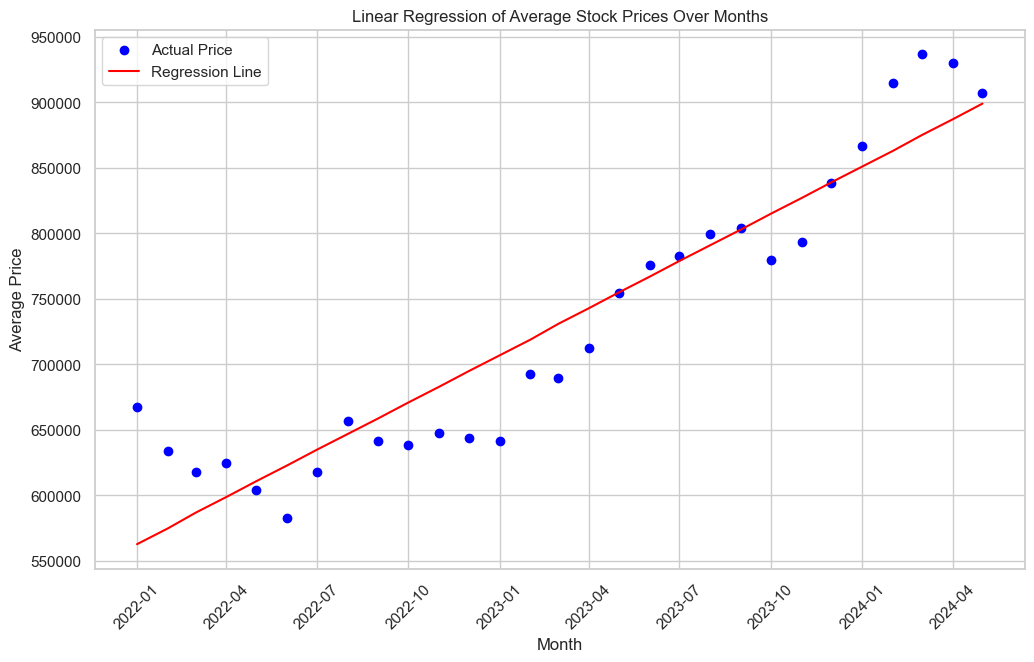

In [114]:
# Extract year and month from Date and compute the average price per month
data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_avg_price = data.groupby('YearMonth')['Price_ZAR'].mean().reset_index()
monthly_avg_price['YearMonth'] = monthly_avg_price['YearMonth'].dt.to_timestamp()

# Fit a linear regression model for monthly data
X_monthly = monthly_avg_price.index.values.reshape(-1, 1)  # Use index as predictor for plotting
y_monthly = monthly_avg_price['Price_ZAR']  # Response
model_monthly = LinearRegression().fit(X_monthly, y_monthly)

# Predict values for the regression line
monthly_avg_price['Predicted'] = model_monthly.predict(X_monthly)

# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(monthly_avg_price['YearMonth'], monthly_avg_price['Price_ZAR'], color='blue', label='Actual Price')
plt.plot(monthly_avg_price['YearMonth'], monthly_avg_price['Predicted'], color='red', label='Regression Line')
plt.title('Linear Regression of Average Stock Prices Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



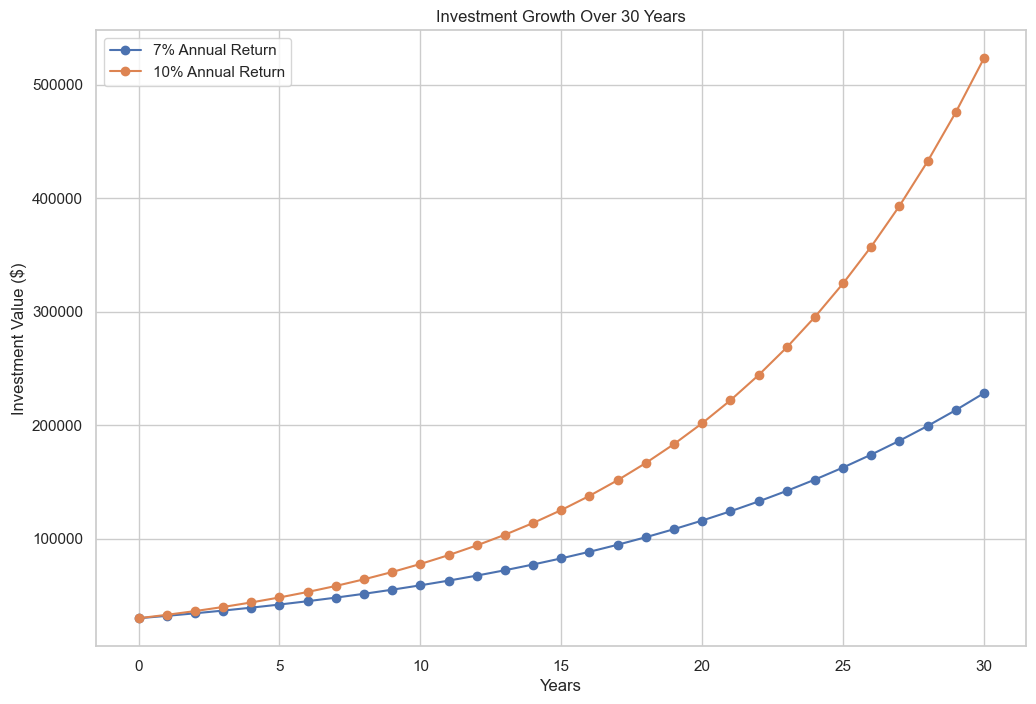

In [115]:
# Constants
initial_investment = 30000  # Initial investment amount
years = 30  # Number of years

# Annual return rates
return_rate_low = 0.07  # Conservative average annual return rate (7%)
return_rate_high = 0.10  # Optimistic average annual return rate (10%)

# Future value calculations
future_value_low = initial_investment * ((1 + return_rate_low) ** years)
future_value_high = initial_investment * ((1 + return_rate_high) ** years)

future_value_low, future_value_high
# Generate the years and investment values over time for both scenarios
years_range = np.arange(0, years + 1)  # From year 0 to year 30
investment_values_low = initial_investment * ((1 + return_rate_low) ** years_range)
investment_values_high = initial_investment * ((1 + return_rate_high) ** years_range)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(years_range, investment_values_low, label='7% Annual Return', marker='o')
plt.plot(years_range, investment_values_high, label='10% Annual Return', marker='o')
plt.title('Investment Growth Over 30 Years')
plt.xlabel('Years')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.show()


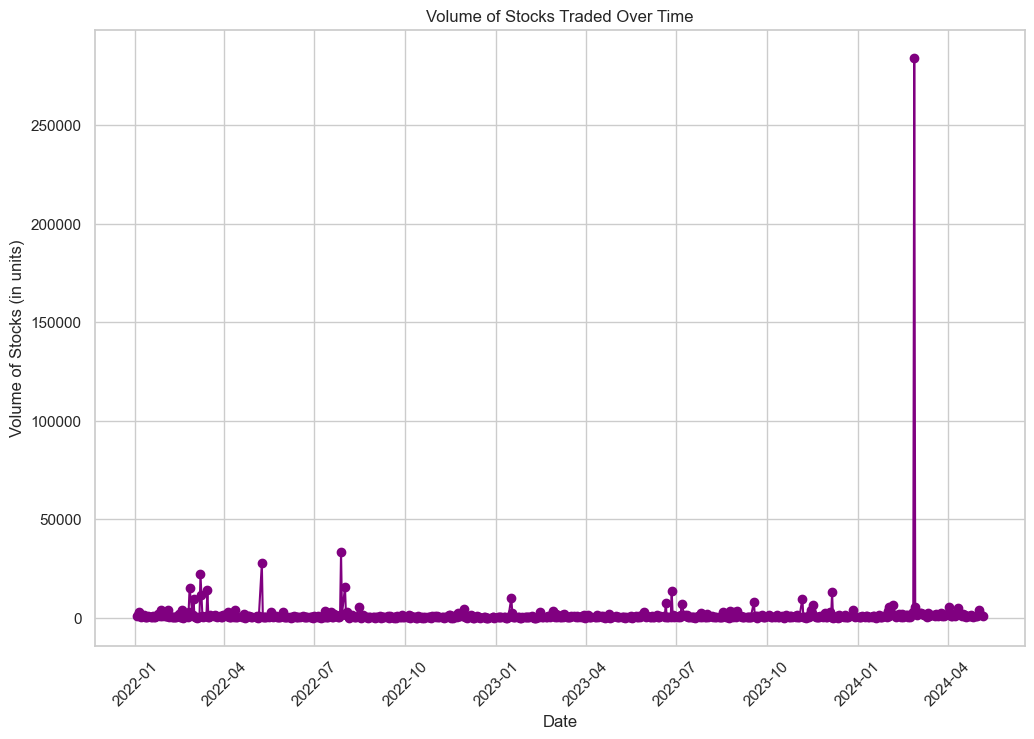

In [116]:
# Plotting the volume of stocks traded over time
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Vol.'], color='purple', marker='o')
plt.title('Volume of Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume of Stocks (in units)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


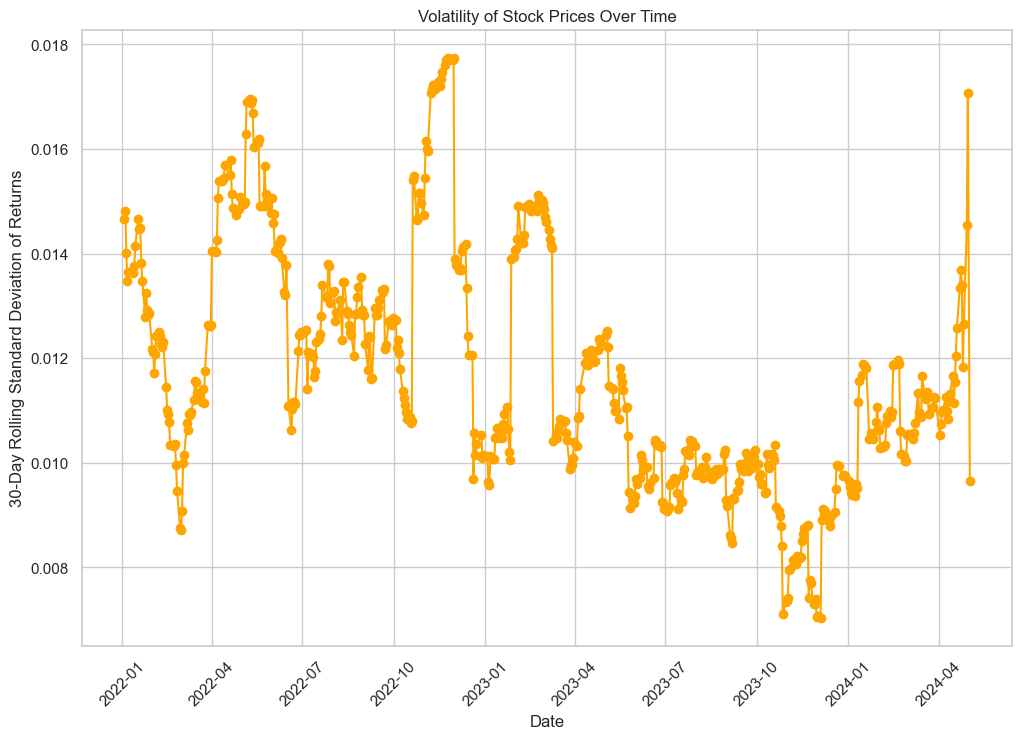

In [117]:
# Calculate daily returns as percentage changes in price
data['Daily_Returns'] = data['Price_ZAR'].pct_change()

# Calculate rolling standard deviation of daily returns to estimate volatility (using a 30-day window)
data['Volatility'] = data['Daily_Returns'].rolling(window=30, min_periods=1).std()

# Plotting the volatility of the stock over time
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Volatility'], color='orange', marker='o')
plt.title('Volatility of Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Standard Deviation of Returns')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [118]:
data = pd.read_csv("ftgc.csv")

In [119]:
data.describe()

,Price,Open,High,Low
count,588.000000,588.000000,588.000000,588.000000
mean,24.978384,24.980272,25.112415,24.832245
std,2.114352,2.128386,2.152443,2.066384
min,21.870000,21.830000,21.980000,21.790000
25%,23.370000,23.330000,23.487500,23.250000
50%,24.230000,24.220000,24.340000,24.105000
75%,26.440000,26.480000,26.625000,26.282500
max,31.460000,31.290000,31.470000,30.020000


In [120]:
# Convert the Price, Open, High, and Low columns from USD to ZAR using the provided exchange rate
exchange_rate = 18.46

data['Price_ZAR'] = data['Price'] * exchange_rate
data['Open_ZAR'] = data['Open'] * exchange_rate
data['High_ZAR'] = data['High'] * exchange_rate
data['Low_ZAR'] = data['Low'] * exchange_rate

# Display the updated dataframe with ZAR conversions
data[['Date', 'Price_ZAR', 'Open_ZAR', 'High_ZAR', 'Low_ZAR']].head()


,Date,Price_ZAR,Open_ZAR,High_ZAR,Low_ZAR
0,05/06/2024,442.3016,440.0864,442.4862,440.0864
1,05/03/2024,438.4250,437.5020,439.1634,436.3944
2,05/02/2024,436.0252,435.6560,436.9482,433.9946
3,05/01/2024,436.3944,439.9018,441.5632,435.4714
4,04/30/2024,442.4862,461.1308,461.1308,442.3016


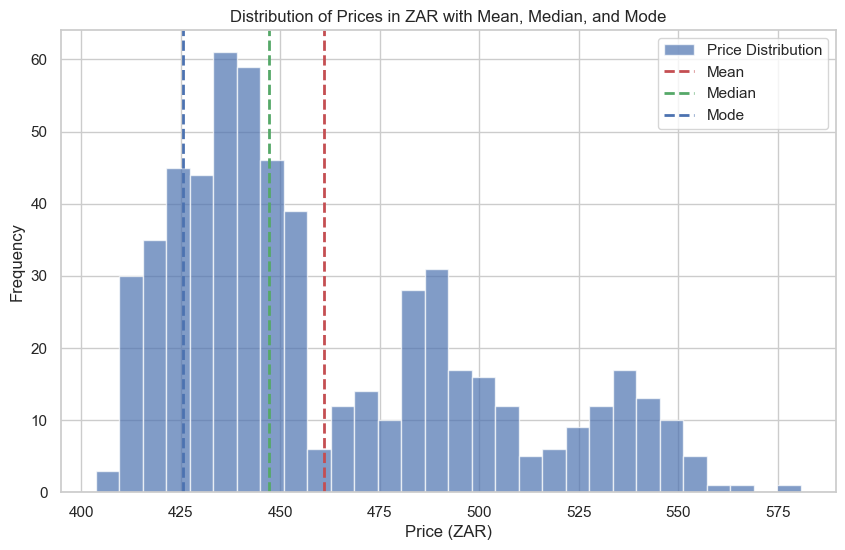

In [121]:
import numpy as np
from scipy import stats

# Calculating descriptive statistics
mean_price = data['Price_ZAR'].mean()
median_price = data['Price_ZAR'].median()
mode_price = data['Price_ZAR'].mode()[0]
std_dev_price = data['Price_ZAR'].std()
variance_price = data['Price_ZAR'].var()

# Print the calculated statistics
mean_price, median_price, mode_price, std_dev_price, variance_price

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data['Price_ZAR'], bins=30, alpha=0.7, label='Price Distribution')
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_price, color='g', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_price, color='b', linestyle='dashed', linewidth=2, label='Mode')
plt.title('Distribution of Prices in ZAR with Mean, Median, and Mode')
plt.xlabel('Price (ZAR)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


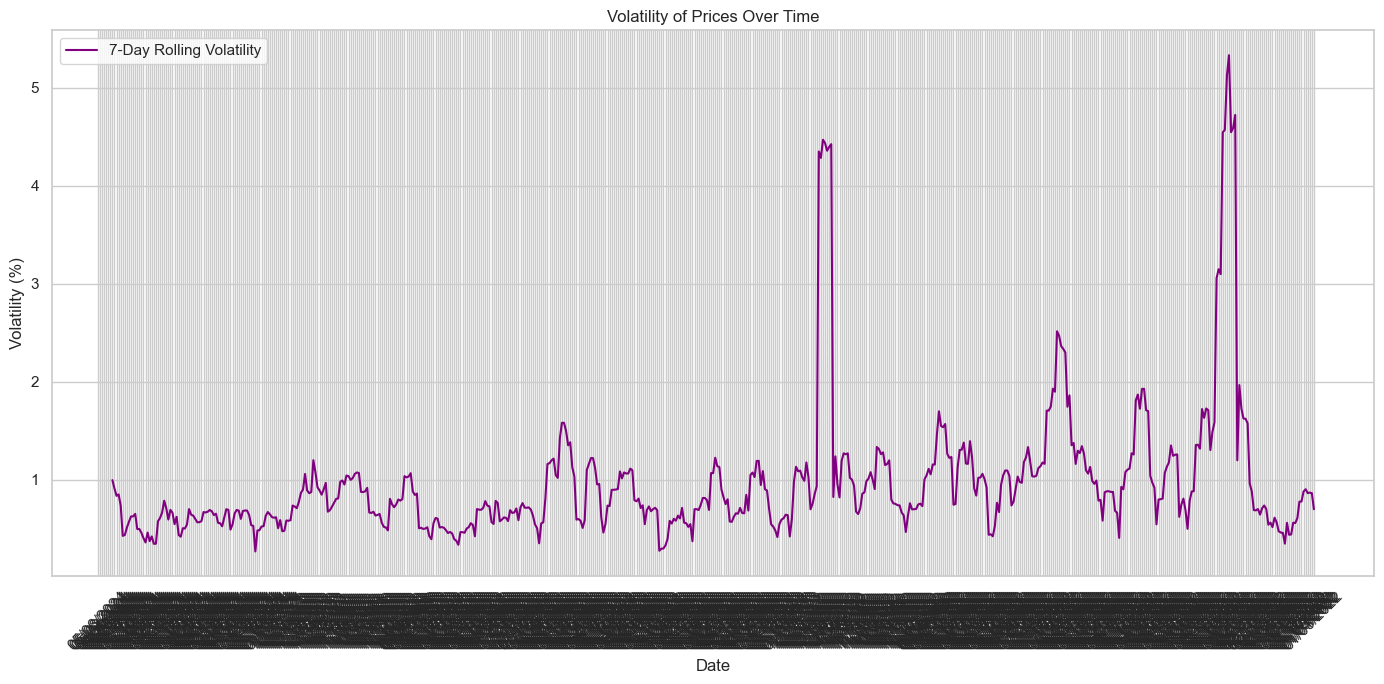

In [122]:
# Calculate daily returns as percentage change of prices
data['Daily_Returns'] = data['Price_ZAR'].pct_change() * 100

# Calculate the rolling standard deviation of daily returns (volatility) using a 7-day window
data['Volatility'] = data['Daily_Returns'].rolling(window=7).std()

# Plotting the volatility
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volatility'], label='7-Day Rolling Volatility', color='purple')
plt.title('Volatility of Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [123]:

# Prepare the data for linear regression
# Convert 'Date' to a numerical format (ordinal) for regression purposes
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Defining the independent variable (Date) and dependent variable (Price)
X = data['Date_ordinal'].values.reshape(-1, 1)
y = data['Price_ZAR'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the prices using the model
data['Price_Predicted'] = model.predict(X)

# Plotting the actual prices and the predicted prices from linear regression
plt.figure(figsize=(14, 7))
plt.scatter(data['Date'], data['Price_ZAR'], color='blue', label='Actual Price', alpha=0.6)
plt.plot(data['Date'], data['Price_Predicted'], color='red', label='Linear Regression Fit')
plt.title('Linear Regression of Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (ZAR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


AttributeError: 'str' object has no attribute 'toordinal'

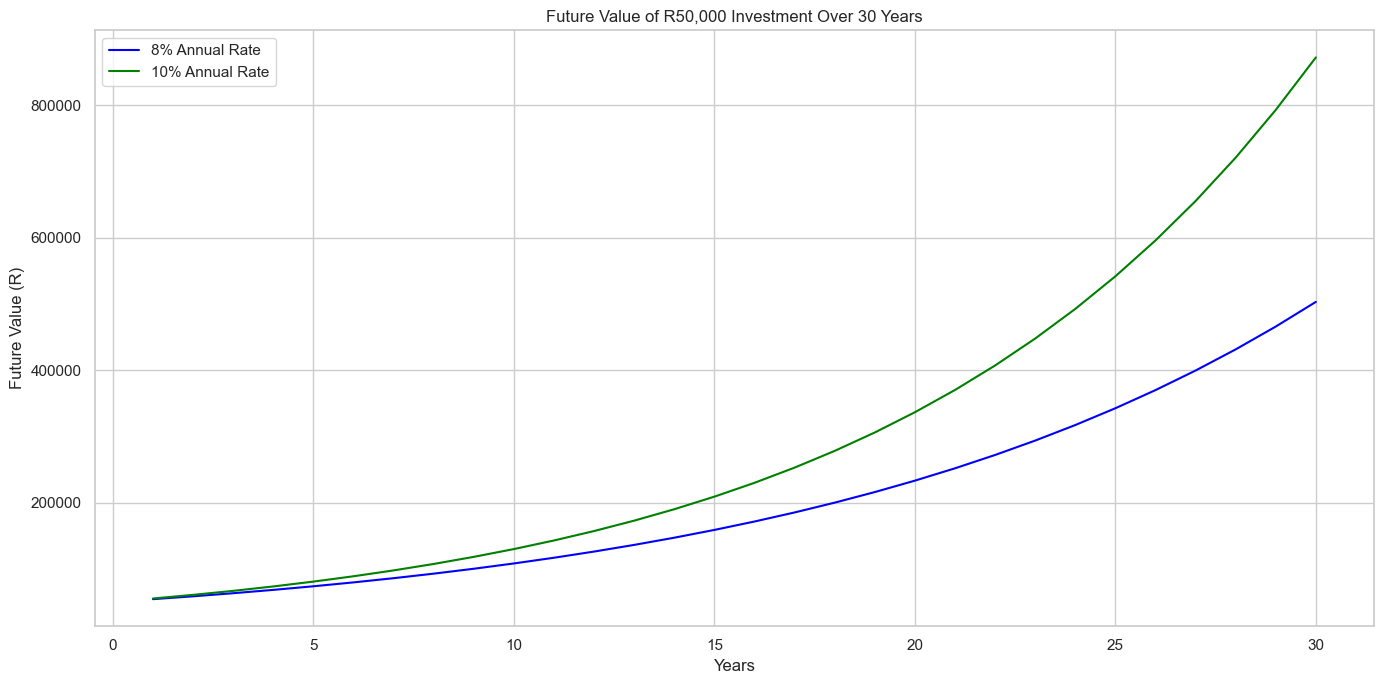

In [ ]:
# Constants
principal = 50000  # Initial investment amount
years = 30  # Investment period in years
rate_low = 0.08  # Minimum interest rate
rate_high = 0.10  # Maximum interest rate

# Future value calculations
fv_low = principal * ((1 + rate_low) ** years)
fv_high = principal * ((1 + rate_high) ** years)

fv_low, fv_high
# Create an array of years and calculate future values for each year within the range for both interest rates
years_array = np.arange(1, 31)  # Array from 1 to 30 years
future_values_low = principal * ((1 + rate_low) ** years_array)
future_values_high = principal * ((1 + rate_high) ** years_array)

# Plotting the future values over 30 years
plt.figure(figsize=(14, 7))
plt.plot(years_array, future_values_low, label='8% Annual Rate', color='blue')
plt.plot(years_array, future_values_high, label='10% Annual Rate', color='green')
plt.title('Future Value of R50,000 Investment Over 30 Years')
plt.xlabel('Years')
plt.ylabel('Future Value (R)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 31, 5))  # Set x-axis ticks to be every 5 years
plt.tight_layout()
plt.show()


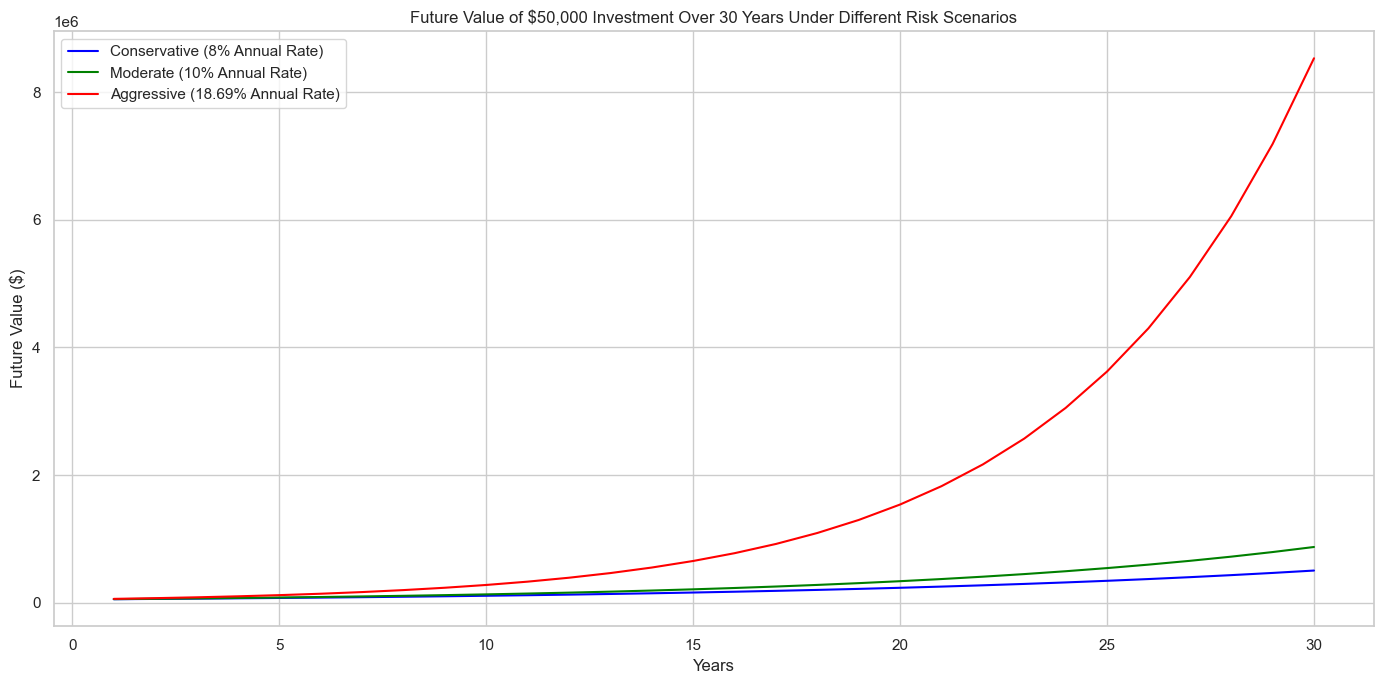

In [ ]:
# Calculate the annualized volatility based on daily returns
# Standard deviation of daily returns is already calculated
daily_volatility = data['Daily_Returns'].std()

# Annualizing the volatility (assuming 252 trading days in a year)
annualized_volatility = daily_volatility * np.sqrt(252)

annualized_volatility
# Define the interest rates for the three scenarios
rate_conservative = 0.08  # Conservative interest rate
rate_moderate = 0.10  # Moderate interest rate
rate_aggressive = annualized_volatility / 100  # Aggressive interest rate based on volatility

# Calculate future values for each scenario
future_values_conservative = principal * ((1 + rate_conservative) ** years_array)
future_values_moderate = principal * ((1 + rate_moderate) ** years_array)
future_values_aggressive = principal * ((1 + rate_aggressive) ** years_array)

# Plotting the future values over 30 years for all scenarios
plt.figure(figsize=(14, 7))
plt.plot(years_array, future_values_conservative, label='Conservative (8% Annual Rate)', color='blue')
plt.plot(years_array, future_values_moderate, label='Moderate (10% Annual Rate)', color='green')
plt.plot(years_array, future_values_aggressive, label='Aggressive (18.69% Annual Rate)', color='red')
plt.title('Future Value of $50,000 Investment Over 30 Years Under Different Risk Scenarios')
plt.xlabel('Years')
plt.ylabel('Future Value ($)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 31, 5))  # Set x-axis ticks to be every 5 years
plt.tight_layout()
plt.show()


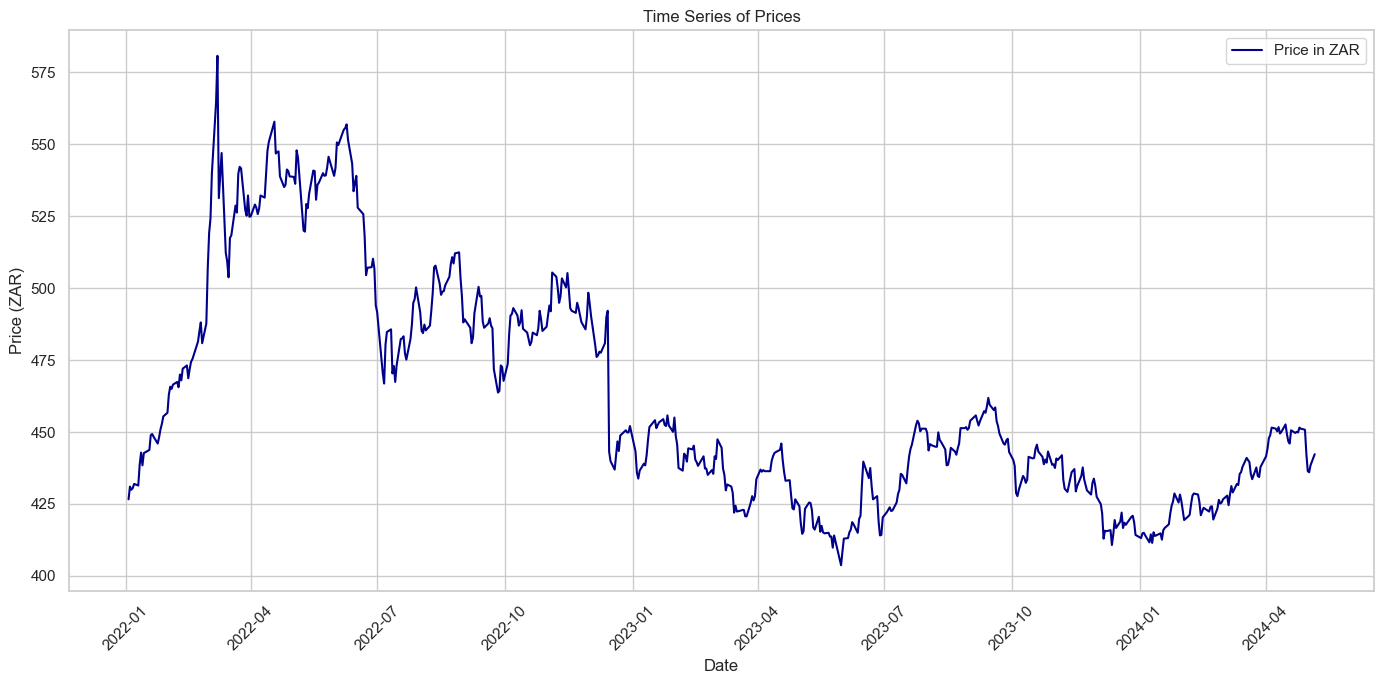

In [ ]:
# Plotting the time series of prices in ZAR
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price_ZAR'], label='Price in ZAR', color='darkblue')
plt.title('Time Series of Prices')
plt.xlabel('Date')
plt.ylabel('Price (ZAR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


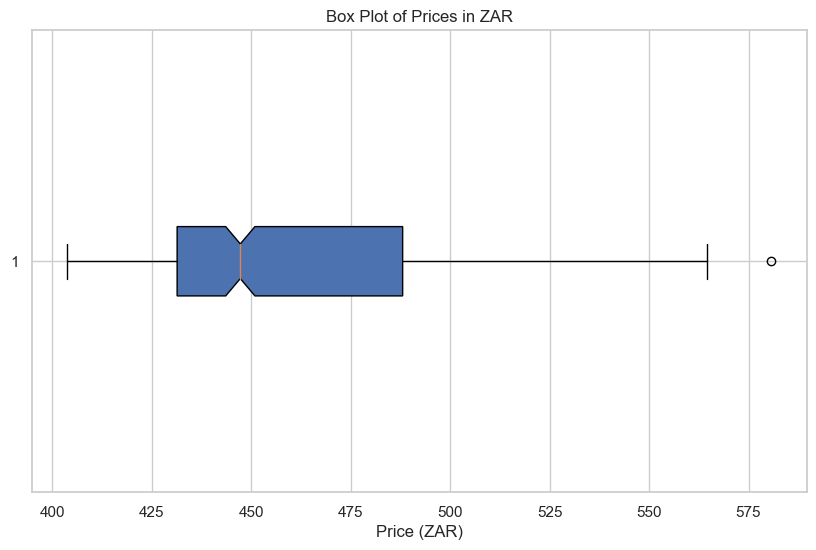

In [ ]:
# Creating a box plot for the prices in ZAR
plt.figure(figsize=(10, 6))
plt.boxplot(data['Price_ZAR'], vert=False, patch_artist=True, notch=True)
plt.title('Box Plot of Prices in ZAR')
plt.xlabel('Price (ZAR)')
plt.grid(True)
plt.show()


In [ ]:
data = pd.read_csv("STX40J ETF.csv")

In [ ]:
columns_to_convert = ['Price', 'Open', 'High', 'Low']
for column in columns_to_convert:
    data[column] = data[column].str.replace(',', '').astype(float)

data['Change %'] = data['Change %'].str.rstrip('%').astype(float)

data['Vol.'] = data['Vol.'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)


data.describe()

,Price,Open,High,Low,Vol.,Change %
count,584.000000,584.000000,584.000000,584.000000,5.840000e+02,584.000000
mean,6767.573630,6802.960616,6855.527397,6698.203767,1.683293e+05,0.018425
std,402.595164,403.177219,398.297560,401.999391,1.589807e+05,1.181362
min,5797.000000,5801.000000,5890.000000,5717.000000,1.513000e+04,-3.800000
25%,6513.500000,6594.250000,6637.000000,6472.500000,8.551750e+04,-0.722500
50%,6826.500000,6849.500000,6900.000000,6750.000000,1.235200e+05,0.030000
75%,7029.250000,7086.750000,7109.000000,6956.250000,1.972200e+05,0.672500
max,7496.000000,7510.000000,7746.000000,7450.000000,1.920000e+06,4.530000


In [ ]:
# Exchange rate from USD to ZAR
exchange_rate_usd_to_zar = 18.46

# Convert the prices to ZAR
data['Price_ZAR'] = data['Price'] * exchange_rate_usd_to_zar

# Show the first few rows of the dataset to confirm the conversion
data[['Date', 'Price', 'Price_ZAR']].head()
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Price_ZAR,Open_ZAR,High_ZAR,Low_ZAR,Daily_Returns,Volatility
0,05/06/2024,23.96,23.84,23.97,23.84,60.55K,0.88%,442.3016,440.0864,442.4862,440.0864,NaN,NaN
1,05/03/2024,23.75,23.70,23.79,23.64,307.77K,0.55%,438.4250,437.5020,439.1634,436.3944,-0.876461,NaN
2,05/02/2024,23.62,23.60,23.67,23.51,410.88K,-0.08%,436.0252,435.6560,436.9482,433.9946,-0.547368,NaN
3,05/01/2024,23.64,23.83,23.92,23.59,335.41K,-1.38%,436.3944,439.9018,441.5632,435.4714,0.084674,NaN
4,04/30/2024,23.97,24.98,24.98,23.96,422.17K,-1.84%,442.4862,461.1308,461.1308,442.3016,1.395939,NaN


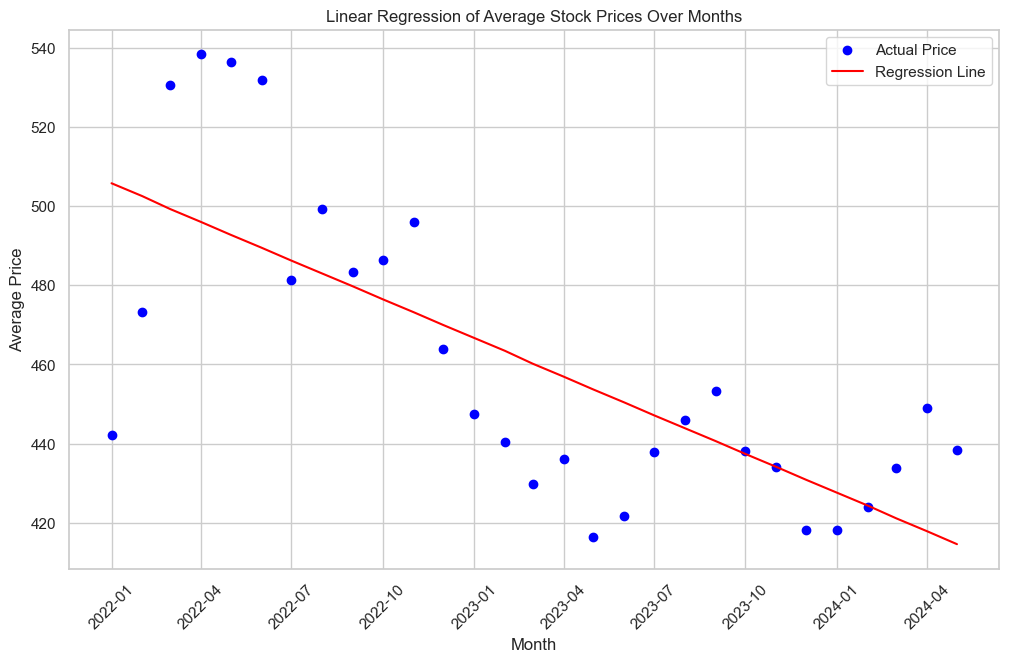

In [ ]:

data['Date'] = pd.to_datetime(data['Date'])
# Extract year and month from Date and compute the average price per month
data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_avg_price = data.groupby('YearMonth')['Price_ZAR'].mean().reset_index()
monthly_avg_price['YearMonth'] = monthly_avg_price['YearMonth'].dt.to_timestamp()

# Fit a linear regression model for monthly data
X_monthly = monthly_avg_price.index.values.reshape(-1, 1)  # Use index as predictor for plotting
y_monthly = monthly_avg_price['Price_ZAR']  # Response
model_monthly = LinearRegression().fit(X_monthly, y_monthly)

# Predict values for the regression line
monthly_avg_price['Predicted'] = model_monthly.predict(X_monthly)

# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(monthly_avg_price['YearMonth'], monthly_avg_price['Price_ZAR'], color='blue', label='Actual Price')
plt.plot(monthly_avg_price['YearMonth'], monthly_avg_price['Predicted'], color='red', label='Regression Line')
plt.title('Linear Regression of Average Stock Prices Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


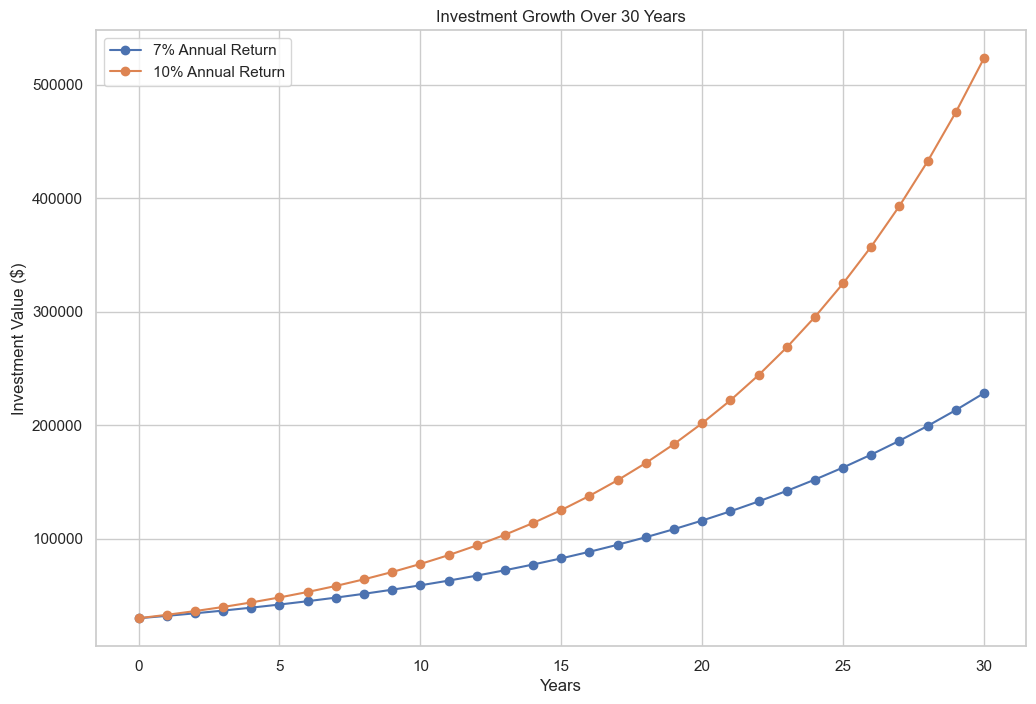

In [ ]:
# Constants
initial_investment = 30000  # Initial investment amount
years = 30  # Number of years

# Annual return rates
return_rate_low = 0.07  # Conservative average annual return rate (7%)
return_rate_high = 0.10  # Optimistic average annual return rate (10%)

# Future value calculations
future_value_low = initial_investment * ((1 + return_rate_low) ** years)
future_value_high = initial_investment * ((1 + return_rate_high) ** years)

future_value_low, future_value_high
# Generate the years and investment values over time for both scenarios
years_range = np.arange(0, years + 1)  # From year 0 to year 30
investment_values_low = initial_investment * ((1 + return_rate_low) ** years_range)
investment_values_high = initial_investment * ((1 + return_rate_high) ** years_range)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(years_range, investment_values_low, label='7% Annual Return', marker='o')
plt.plot(years_range, investment_values_high, label='10% Annual Return', marker='o')
plt.title('Investment Growth Over 30 Years')
plt.xlabel('Years')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.show()


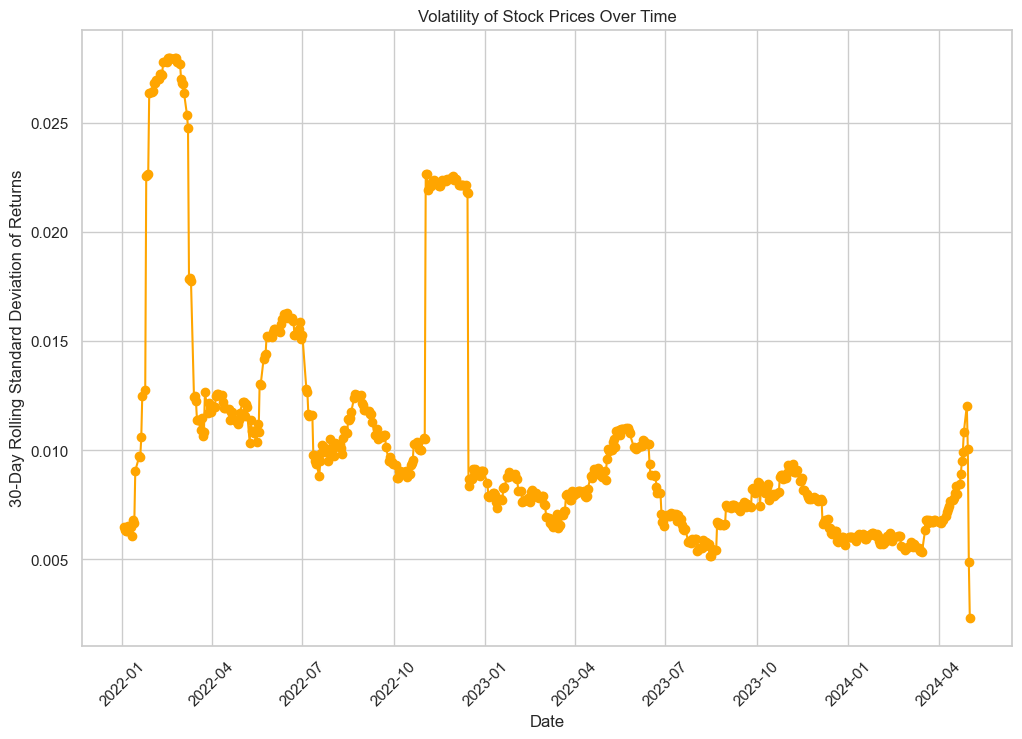

In [127]:
# Calculate daily returns as percentage changes in price
data['Daily_Returns'] = data['Price_ZAR'].pct_change()

# Calculate rolling standard deviation of daily returns to estimate volatility (using a 30-day window)
data['Volatility'] = data['Daily_Returns'].rolling(window=30, min_periods=1).std()

# Plotting the volatility of the stock over time
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Volatility'], color='orange', marker='o')
plt.title('Volatility of Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Standard Deviation of Returns')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()